# Анализ сервиса аренды самокатов GoFast

## Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
<br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.<br>
Сервисом можно пользоваться:
1. Без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. С подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

## Описание данных

**Пользователи** — ``users_go.csv``
- *user_id* — уникальный идентификатор пользователя
- *name* — имя пользователя
- *age* — возраст
- *city* — город
- *subscription_type* — тип подписки (free, ultra)<br>
<br>

**Поeздки** — ``rides_go.csv``
- *user_id* — уникальный идентификатор пользователя
- *distance* — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- *duration* — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- *date* — дата совершения поездки <br>
<br>

**Подписки** — ``subscriptions_go.csv``
- *subscription_type* — тип подписки
- *minute_price* — стоимость одной минуты поездки по данной подписке
- *start_ride_price* — стоимость начала поездки
- *subscription_fee* — стоимость ежемесячного платежа

## План проекта

- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчёт выручки
- Проверка гипотез
- Распределения
- Вывод

## Загрузка и изучение данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from math import sqrt
from scipy import stats as st
from scipy.stats import binom

Считаем данные из csv-файла в датафреймы и сохраним в переменные users_go, rides_go, subscriptions_go:

In [2]:
try:
    users_go = pd.read_csv('/datasets/users_go.csv') 
    rides_go = pd.read_csv('/datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv') 
except:
    users_go = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/GoFast/users_go.csv') 
    rides_go = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/GoFast/rides_go.csv') 
    subscriptions_go = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/GoFast/subscriptions_go.csv') 

Выведем первые 3 строки датафреймов:

In [3]:
display(users_go.head(3))
display(rides_go.head(3))
display(subscriptions_go.head(3))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выведем основную информацию о датафреймах с помощью метода info():

In [4]:
def print_primary_info(dataset):
    print("\nПервичная информация о датафрейме")
    print("Количество записей:", dataset.shape[0])
    print("Количество столбцов:", dataset.shape[1])
    print("Первые 5 записей:")
    display(dataset.head())
    print("Информация о столбцах:")
    print(dataset.info())

In [5]:
#информация о датафрейме users_go
print_primary_info(users_go);


Первичная информация о датафрейме
Количество записей: 1565
Количество столбцов: 5
Первые 5 записей:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [6]:
#информация о датафрейме rides_go
print_primary_info(rides_go);


Первичная информация о датафрейме
Количество записей: 18068
Количество столбцов: 4
Первые 5 записей:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [7]:
#информация о датафрейме subscriptions_go
print_primary_info(subscriptions_go);


Первичная информация о датафрейме
Количество записей: 2
Количество столбцов: 4
Первые 5 записей:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


Проверим датафрейм `users_go` на отсутствующие значения:

In [8]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Проверим датафрейм `rides_go` на отсутствующие значения:

In [9]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Проверим датафреймы `users_go` и `rides_go` на явные дубликаты:

In [10]:
print('Количество явных дубликатов в users_go = ', users_go.duplicated().sum())
print('Количество явных дубликатов в rides_go = ', rides_go.duplicated().sum())

Количество явных дубликатов в users_go =  31
Количество явных дубликатов в rides_go =  0


### Промежуточный вывод

- В `users_go` 1565 записи, пропуски отсутствуют, количество явных дубликатов 31.
- В `rides_go` 18068 записи, пропуски отсутствуют, явных дубликатов нет. В столбце *date* некорректный тип данных.
- В `subscriptions_go` 2 записи, пропуски отсутствуют, явных дубликатов нет.
- Данные полные и достаточны для исследования.

## Предобработка данных

### Меняем тип данных

Приведем столбец *date* из датафрейма `rides_go` к типу datetime:

In [11]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

### Создаём новый столбец с номером месяца

Проверим за какой год представленны данные чтоб не было ошибок:

In [12]:
rides_go['date'].dt.year.unique()

array([2021])

Данные представленны только 2021 год.

In [13]:
rides_go['month'] = rides_go['date'].dt.month

### Удаление дубликатов

In [14]:
users_go.drop_duplicates(inplace=True)

In [15]:
print('Количество явных дубликатов в users_go = ', users_go.duplicated().sum())

Количество явных дубликатов в users_go =  0


Проверим столбец *city* датафрейма `users_go` на неявные дубликаты:

In [16]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты отсутсвуют.

### Промежуточный вывод

- В столбце *date* из датафрейма `rides_go` поменяли тип данных на datetime.
- В датафрейм `rides_go` добавили столбец *month*.
- В датафрейме `users_go` удалили дубликаты.
- Данные готовы для дальнейшего иследования.

## Исследовательский анализ данных

### Частота встречаемости городов

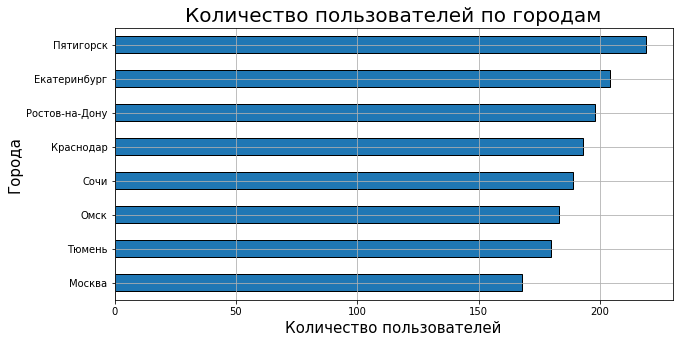

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [17]:
(users_go.pivot_table(index='city', values='user_id', aggfunc='count')
        .sort_values(by='user_id', ascending=True)
        .plot(kind='barh', ec='black', grid=True, figsize=(10, 5), legend=False))
    
plt.title('Количество пользователей по городам', size=20)
plt.ylabel('Города', size=15)
plt.xlabel('Количество пользователей', size=15)
plt.show()

users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

**Вывод:** В данных присутсвуют 8 городов. Больше всего пользователей в Пятигорске и Екатеринбурге.

### Соотношение пользователей с подпиской и без подписки

Всего пользователей: 1534
С подпиской: 699
Без подписки: 835


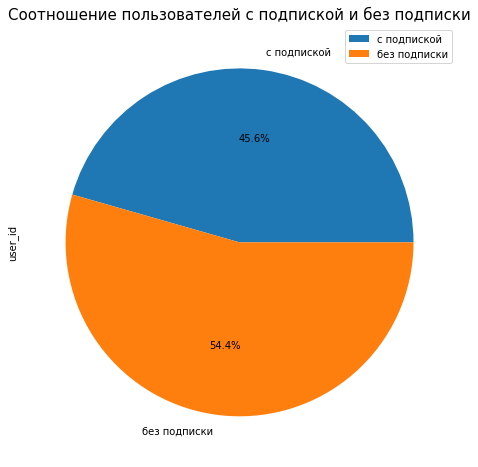

In [18]:
print('Всего пользователей:', users_go.shape[0])
print('С подпиской:', (users_go['subscription_type'] == 'ultra').sum())
print('Без подписки:', (users_go['subscription_type'] == 'free').sum())

(users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=True)
    .plot(kind = 'pie', y='user_id', figsize=(8,8), autopct='%1.1f%%', labels=['с подпиской','без подписки'],))
plt.title('Соотношение пользователей с подпиской и без подписки', size=15)
plt.show()

**Вывод:** Без подписки пользователей больше почти на 9%. С подпиской - 699 и Без подписки - 835.

### Возраст пользователей

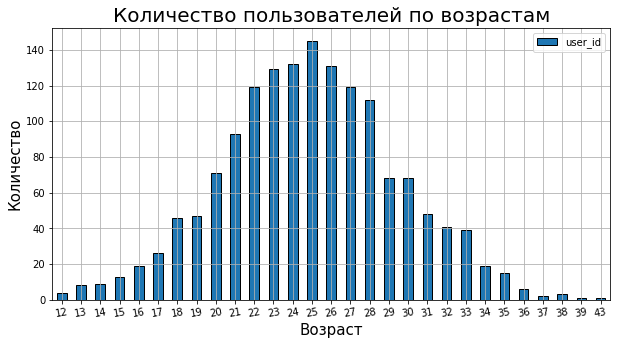

In [19]:
(users_go.pivot_table(index='age', values='user_id', aggfunc='count')
         .sort_values(by='age', ascending=True)
         .plot(kind='bar', ec='black', grid=True, figsize=(10, 5)))
plt.title('Количество пользователей по возрастам', size=20)
plt.xlabel('Возраст', size=15)
plt.xticks(rotation=10)
plt.ylabel('Количество', size=15)
plt.show()

In [20]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

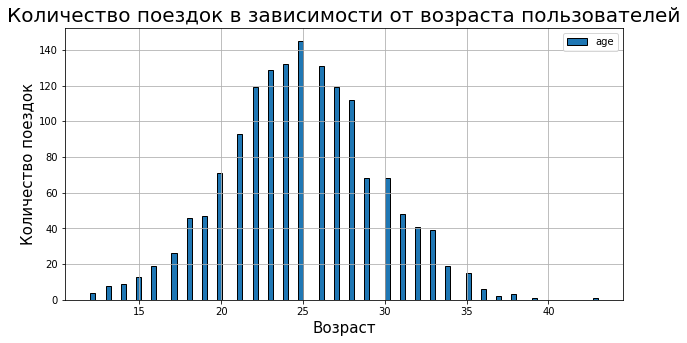

In [21]:
users_go['age'].hist(bins=100,figsize=(10, 5), ec='black', legend=True)
plt.title('Количество поездок в зависимости от возраста пользователей', size=20)
plt.xlabel('Возраст', size=15)
plt.ylabel('Количество поездок', size=15)
plt.show()

**Вывод:**
- Минимальный возраст 12 лет и максимальный 43.
- Средний возраст пользователей нормально распределён с медианой равной 25 лет. Средний и медианный возраст почти равны. Основной возраст пользователей 22-28 лет.

### Расстояние, которое пользователь преодолел за одну поездку

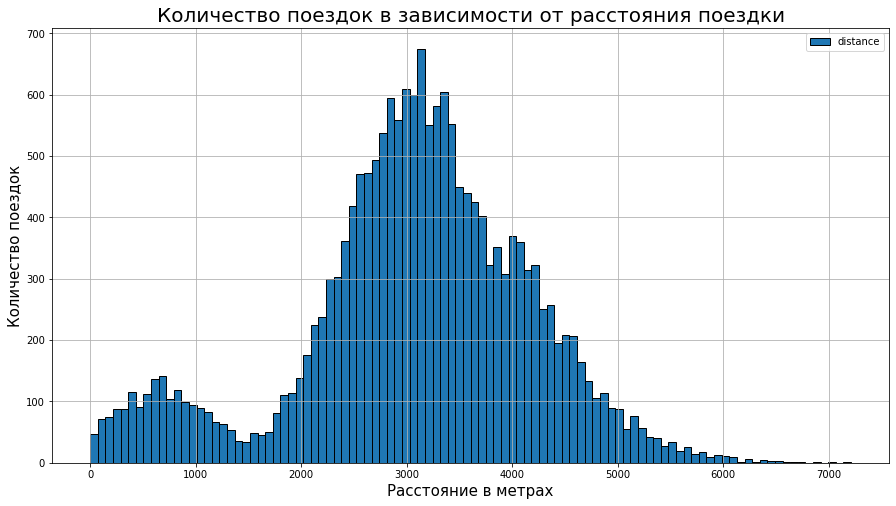

In [22]:
rides_go['distance'].hist(bins=100,figsize=(15, 8), ec='black', legend=True)
plt.title('Количество поездок в зависимости от расстояния поездки', size=20)
plt.xlabel('Расстояние в метрах', size=15)
plt.ylabel('Количество поездок', size=15)
plt.show()

In [23]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

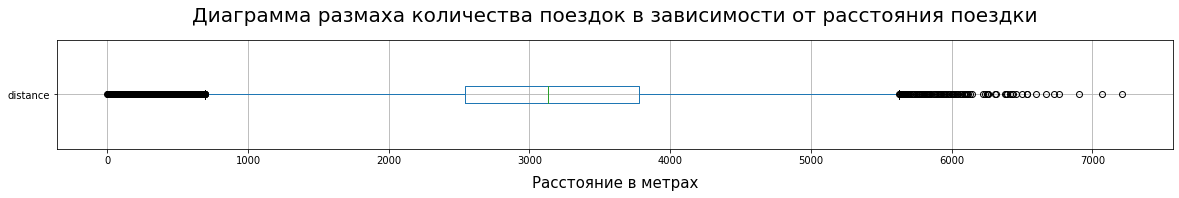

In [24]:
fig, ax = plt.subplots(figsize = (20,2))
ax = rides_go[['distance']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества поездок в зависимости от расстояния поездки', pad = 18, size=20)
ax.set_xlabel('Расстояние в метрах', labelpad=10, size=15);

**Вывод:**
- Минимальная поездка 86 метров и максимальная 7211 метров.
- Средняя и медианная примерно равны 3100 метров. Первый квартиль равен 2543 метра, второй - 3776.
- Распределение имеет два пика 700 и 3100 метра. Оба пика имеют нормальное распределение.
- Поездки меньши 600 метров и больше 6000 метров это выбросы, оставим без внимания.

### Продолжительность поездок

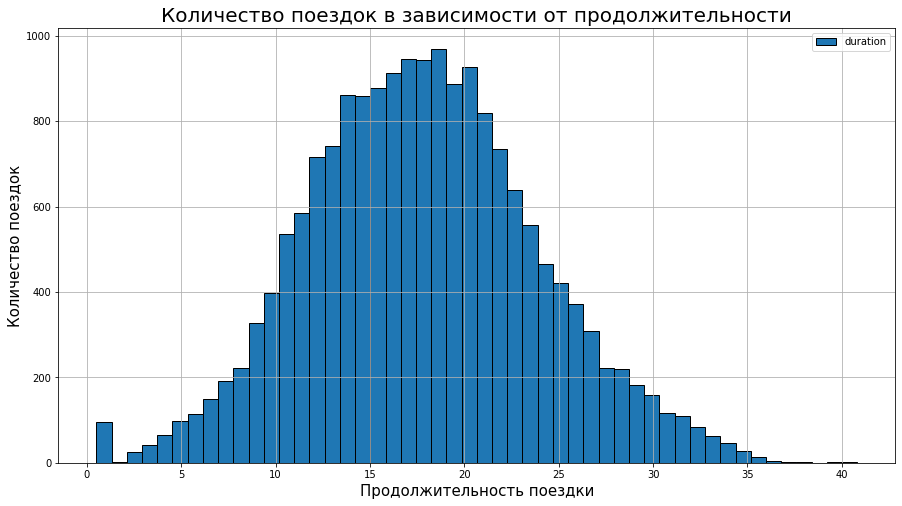

In [25]:
rides_go['duration'].hist(bins=50,figsize=(15, 8), ec='black', legend=True)
plt.title('Количество поездок в зависимости от продолжительности', size=20)
plt.xlabel('Продолжительность поездки', size=15)
plt.ylabel('Количество поездок', size=15)
plt.show()

In [26]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

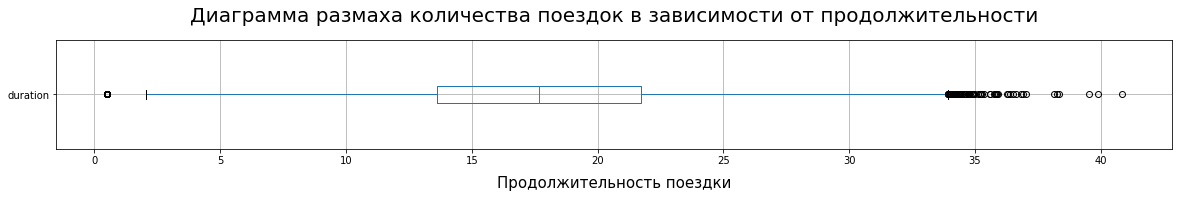

In [27]:
fig, ax = plt.subplots(figsize = (20,2))
ax = rides_go[['duration']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества поездок в зависимости от продолжительности', pad = 18, size=20)
ax.set_xlabel('Продолжительность поездки', labelpad=10, size=15);

**Вывод:**
- Минимальная поездка полминуты и максимальная почти 41 минута.
- Средняя и медианная примерно равны 18 минутам. 
- Первый квартиль располагается в райне 14 минут, третий - 22 минуты.
- Поездки длительностью меньше минуты могут быть аномальными, что может указывать на неисправность самоката.
- Гистограмма показывает нормальное распределение продолжительности поездок.

### Промежуточный вывод

- В данных присутсвуют 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург, Сочи. Больше всего пользователей в Пятигорске и Екатеринбурге.
- Без подписки пользователей больше, почти на 9%. Всего пользователей - 1534. С подпиской - 699 и без подписки - 835.
- Средний возраст пользователей нормально распределён с медианой, равной 25 годам. Средний и медианный возраст почти равны. Основной возраст пользователей — 22–28 лет.
- Средняя и медианная растояния поездки примерно равны 3100 метров. Первый квартиль равен 2543 метра, второй - 3776. Распределение имеет два пика 700 и 3100 метра. Оба пика имеют нормальное распределение зависимости. Поездки меньши 600 метров и больше 6000 метров это выбросы, оставим без внимания.
- Средняя и медианная времени поедки примерно равны 18 минутам. Первый квартиль располагается в райне 14 минут, второй - 22 минуты. Поездки длительностью меньше минуты могут быть аномальными, что может указывать на неисправность самоката (оставим без внимания). Зависимость количества поездок от времени имеет нормальное распределение.

## Объединение данных

### Объединение

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуем методом merge().

In [28]:
data_go = pd.merge(users_go, subscriptions_go, on='subscription_type')
data_go = pd.merge(rides_go, data_go, on='user_id')

In [29]:
data_go.info()
display(data_go)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Проверим датафрейм `data_go` на отсутствующие значения:

In [30]:
data_go.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод:**
- Полученный датафрейм `data_go` имеет 18086 записей о поездках.
- Пропуски отсутствуют.
- Данные полные, потерь при объединении нет.

### Создание ещё два датафрейма

С данными о пользователях без подписки:

In [31]:
data_go_free = data_go[data_go['subscription_type'] == 'free']
data_go_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


С данными о пользователях с подпиской:

In [32]:
data_go_ultra = data_go[data_go['subscription_type'] == 'ultra']
data_go_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [33]:
# Проверим на пропуски:
print(data_go_free.isna().sum())
print()
print(data_go_ultra.isna().sum())

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [34]:
print('Количество записей в данных без подписки:',data_go_free.shape[0])
print('Количество записей в данных с подпиской:',data_go_ultra.shape[0])
print('Всего записей:', data_go_free.shape[0]+data_go_ultra.shape[0])

Количество записей в данных без подписки: 11568
Количество записей в данных с подпиской: 6500
Всего записей: 18068


**Вывод:**
- Созданны два датафрейма `data_go_free` - поездки без подписки и `data_go_ultra` - с подпиской.
- При разделении пропусков и потерь данных нет.

###  Визуализируем информацию о расстоянии и времени поездок

Визуализация информации о расстоянии:

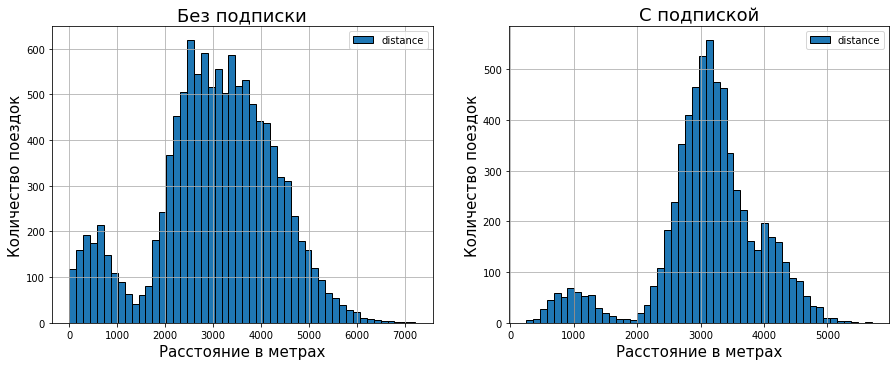

In [35]:
plt.figure(figsize=(15, 12))
ax1 = plt.subplot(2, 2, 1)
data_go_free['distance'].hist(bins=50, ec='black', legend=True, grid=True, ax=ax1)
plt.title('Без подписки',fontsize=18)
plt.ylabel('Количество поездок',fontsize=15)
plt.xlabel('Расстояние в метрах',fontsize=15)

ax2 = plt.subplot(2, 2, 2)
data_go_ultra['distance'].hist(bins=50, ec='black', legend=True, grid=True, ax=ax2)
plt.title('С подпиской',fontsize=18)
plt.ylabel('Количество поездок',fontsize=15)
plt.xlabel('Расстояние в метрах',fontsize=15)
plt.show();

Визуализация информации о времени поездок:

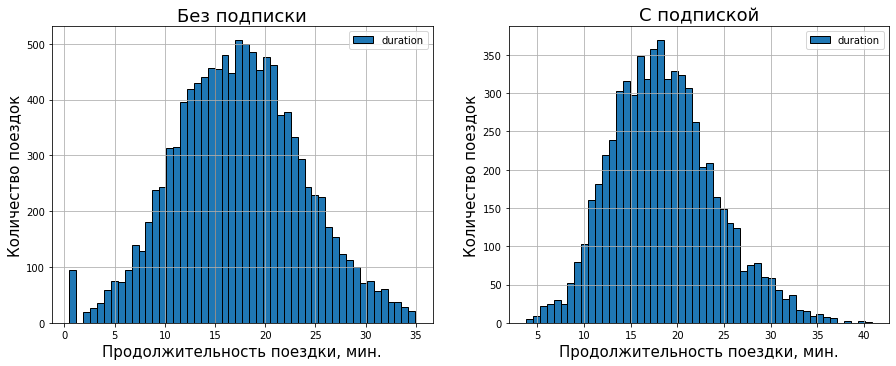

In [36]:
plt.figure(figsize=(15, 12))
ax1 = plt.subplot(2, 2, 1)
data_go_free['duration'].hist(bins=50, ec='black', legend=True, grid=True, ax=ax1)
plt.title('Без подписки',fontsize=18)
plt.ylabel('Количество поездок',fontsize=15)
plt.xlabel('Продолжительность поездки, мин.',fontsize=15)

ax2 = plt.subplot(2, 2, 2)
data_go_ultra['duration'].hist(bins=50, ec='black', legend=True, grid=True, ax=ax2)
plt.title('С подпиской',fontsize=18)
plt.ylabel('Количество поездок',fontsize=15)
plt.xlabel('Продолжительность поездки, мин.',fontsize=15)
plt.show();

In [37]:
data_go_free[['distance','duration']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance,11568.0,3045.495282,1246.173806,0.855683,2366.562689,3114.648465,3905.697894,7211.007745
duration,11568.0,17.390909,6.326803,0.500000,12.958437,17.326890,21.594071,34.948498


In [38]:
data_go_ultra[['distance','duration']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance,6500.0,3115.445388,836.895330,244.210438,2785.444017,3148.637229,3560.574425,5699.769662
duration,6500.0,18.541985,5.572048,3.760353,14.524654,18.178153,21.884129,40.823963


### Промежуточный вывод

- На этом этапе объеденили данные в одну таблицу, разделили на датафреймы: без подписки `data_go_free` и с подпиской `data_go_ultra`.
- Расстояние поездки без подписки варьируется в пределах от 2000 до 4500 метров, с медианной величиной 3115 метров. В то время как с подпиской это расстояние составляет от 2800 до 3500 метров, с медианной величиной 3148 метров.
- Время поездки без подписки варьируется от 10 до 18 минут, с медианной величиной чуть больше 17 минут. В то время как с подпиской это время составляет от 13 до 23 минут, с медианной величиной чуть больше 18 минут.

Согласно данных и их визуализации можно сделать вывод, что вероятно подпиской регулярно пользуются одни и те же пользователи, чтобы добраться до учебы или работы.

## Подсчёт выручки

### Подсчёт общей выручки сервиса

 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 7:

In [39]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
data_go['duration'] = np.ceil(data_go['duration'])

revenue = data_go.pivot_table(
    index=('user_id', 'month'), 
    values=('distance', 
            'duration', 
            'minute_price', 
            'start_ride_price', 
            'subscription_fee'), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',}))

revenue.columns = ['count', 'distance', 'duration', 
                   'minute_price','start_ride_price', 
                   'subscription_fee']

revenue.head(20)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   
        8          1    923.007439       7.0             6                 0   
        10         1   2824.636598      19.0             6                 0   
        12         1   3828.248580      12.0             6                 0   
3       1          1   3061.777147      13.0             6                 0   
        2          2   5421.152016      39.0             6                 0   
        4          1   2956.651632      21.0             6                 0   
        5          3   9064.026918      63.0             6                 0   
        7          3  10919.595403      67.0             6                 0   
        9          1   2891.012822      23.0             6                 0   
        12         1   2593.381928      13.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199  
        8                   199  
        10                  199  
        12                  199  
3       1                   199  
        2                   199  
        4                   199  
        5                   199  
        7                   199  
        9                   199  
        12                  199

In [40]:
#Проверим на наличие пропусков:
revenue.isna().sum()

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

В этот же датафрейм добавляем столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [41]:
revenue['revenue'] = (revenue['start_ride_price']*revenue['count']+
                      revenue['minute_price']*revenue['duration']+
                      revenue['subscription_fee'])
display(revenue.head(20))
print('Записи с ', data_go['date'].min(), 'по', data_go['date'].max())
print('Выручка за 2021 год составила:',revenue['revenue'].sum(), 'руб.')

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   
        8          1    923.007439       7.0             6                 0   
        10         1   2824.636598      19.0             6                 0   
        12         1   3828.248580      12.0             6                 0   
3       1          1   3061.777147      13.0             6                 0   
        2          2   5421.152016      39.0             6                 0   
        4          1   2956.651632      21.0             6                 0   
        5          3   9064.026918      63.0             6                 0   
        7          3  10919.595403      67.0             6                 0   
        9          1   2891.012822      23.0             6                 0   
        12         1   2593.381928      13.0             6                 0   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
        12                  199    367.0  
2       3                   199    577.0  
        4                   199    439.0  
        6                   199    283.0  
        7                   199    487.0  
        8                   199    241.0  
        10                  199    313.0  
        12                  199    271.0  
3       1                   199    277.0  
        2                   199    433.0  
        4                   199    325.0  
        5                   199    577.0  
        7                   199    601.0  
        9                   199    337.0  
        12                  199    277.0

Записи с  2021-01-01 00:00:00 по 2021-12-30 00:00:00
Выручка за 2021 год составила: 3878641.0 руб.


### Подсчёт выручки с подпиской и без

In [42]:
print('Выручка пользователей с подпиской за 2021 год составила:',\
      revenue.loc[revenue['subscription_fee'] > 0, 'revenue'].sum(), 'руб.')
print('Количество поездок с подпиской:',data_go_ultra.shape[0])
print('Выручка пользователей без подписки за 2021 год составила:',\
      revenue.loc[revenue['subscription_fee'] == 0, 'revenue'].sum(), 'руб.')
print('Количество поездок без подписки:',data_go_free.shape[0])

Выручка пользователей с подпиской за 2021 год составила: 1644537.0 руб.
Количество поездок с подпиской: 6500
Выручка пользователей без подписки за 2021 год составила: 2234104.0 руб.
Количество поездок без подписки: 11568


In [43]:
print('С подпиской:')
print(revenue.loc[revenue['subscription_fee'] > 0, 'revenue'].describe())

С подпиской:
count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: revenue, dtype: float64


In [44]:
print('Без подписки:')
print(revenue.loc[revenue['subscription_fee'] == 0, 'revenue'].describe())

Без подписки:
count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue, dtype: float64


### Промежуточный вывод

- В данных записи только за 2021 год.
- Выручка сервиса аренды самокатов GoFast составила: 3878641.0 рублей. Выручка пользователей с подпиской 1644537.0 руб. и без подписки - 2234104.0 руб.
- В среднем пользователи с подпиской тратят на поездку 362,8 рублей, без подписки 328,6 рублей.

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.<br>
<br>
**Проверим гипотезу:** пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.
- H0: Среднее время поездки пользователей с подпиской ultra = среднему времени поездки пользователей без подписке.
- H1: Среднее время поездки пользователей с подпиской ultra > среднего времени поездки пользователей без подписке.
- alpha = 0.05

In [45]:
results = st.ttest_ind(
    data_go_ultra['duration'], 
    data_go_free['duration'],
    alternative='greater')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**  Проверили гипотезу и можем сделать верное предположение, что среднее время поездки пользователей с подпиской ultra больше среднего времени поездки пользователей без подписке.

### Проверим, что пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.<br>
<br>
**Проверим гипотезу:** пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
- H0: Среднее расстояние поездки пользователей с подпиской ultra = 3130 метров
- H1: Среднее расстояние поездки пользователей с подпиской ultra > 3130 метров
- alpha = 0.05

In [46]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_go_ultra['distance'], 
    distance,
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть гипотезу. Мы не можем утверждать, что расстояние, которое проехали пользователи с поездкой ultra, не превышает 3130 метров.

### Проверим гипотезу о помесячной выручки

 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.<br>
 <br>
 **Проверим гипотезу:** помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
- H0: Выручка от пользователей с подпиской ultra = выручке от пользователей без подписки.
- H1: Выручка от пользователей с подпиской ultra > выручки от пользователей без подписки.
- alpha = 0.05

In [47]:
results = st.ttest_ind(
    revenue.loc[revenue['subscription_fee'] > 0, 'revenue'], 
    revenue.loc[revenue['subscription_fee'] == 0, 'revenue'],
    alternative='greater')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Проверили гипотезу и можем сделать верное предположение: выручка от пользователей с подпиской ultra больше выручки от пользователей без подписки.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Стоит  поправить все выводы

### Разбор ситуации

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?**

Теоретически это две зависимые выборки. В данных некоторая переменная измеряется дважды (количество обращений до обновления и после него) для одних и тех же пользователей и имеет одинаковые размеры. В этом случае можно применить метод `scipy.stats.ttest_rel()`. При проверке на то, что истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения, следует указать `alternative="less"`: `scipy.stats.ttest_rel(after, before, alternative="less")`.
<br>
Если требования к зависимым выборкам не выполняются, можно воспользоваться методом `scipy.stats.ttest_ind(after, before, equal_var=False, alternative="less")`,`equal_var=False` применяем по причине что выборки не равны.

### Промежуточный вывод

- Проверили гипотезу и можем сделать верное предположение, что среднее время поездки пользователей с подпиской ultra больше среднего времени поездки пользователей без подписке.
- Не получилось отвергнуть гипотезу. Мы не можем утверждать, что расстояние, которое проехали пользователи с поездкой ultra, не превышает 3130 метров.
- Проверили гипотезу и можем сделать верное предположение: выручка от пользователей с подпиской ultra больше выручки от пользователей без подписки.
- Если выборки зависимы используем метод `scipy.stats.ttest_rel(after, before, alternative="less")`. Если требования к зависимым выборкам не выполняются, можно воспользоваться методом `scipy.stats.ttest_ind(after, before, equal_var=False, alternative="less")`,`equal_var=False` применяем по причине что выборки не равны.

## Распределения

### Задача 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. <br>
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве = 1161 вероятность, не выполнить план меньше 5.0 %


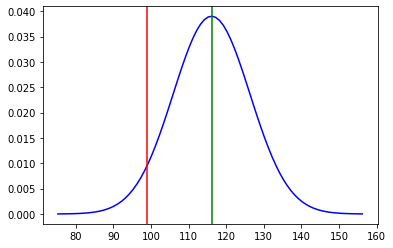

In [48]:
n = 1000 # Количество промокодов
p = 0.1  # Вероятность продления подписки
k = 99   # Минимальное количество продлений
binom_cdf = 0.05 # Вероятность не выполнить план

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве = {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**Вывод:** Необходимо раздать как минимум 1161 промокода, чтобы как минимум 100 существующих клиентов продлили подписку. Вероятность не выполнить план составляет 5%.

### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. <br>
С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений: 0.15371708296369768


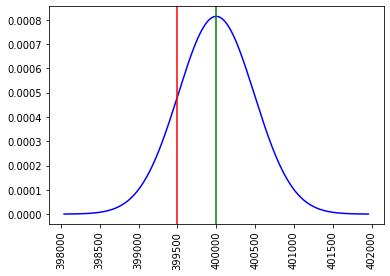

In [49]:
# параметры биномиального распределения
n = 1000000 # Общее количество уведомлений
p = 0.4     # Вероятность открытия уведомления
k = 399500  # Минимальное количество пользователей
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p                   # параметры 
sigma = sqrt(n * p * (1 - p))# нормального распределения

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result)

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**Вывод:** Если разослать 1 млн уведомлений и учесть, что откроют их только 40% получивших клиентов, вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 0.1537 или 15,37%.

## Вывод

В ходе исследования данных о пользователях популярного сервиса аренды самокатов GoFast были выполнены следующие этапы и сделаны выводы:
1) Загрузка и изучение данных:
- В `users_go` 1565 записи, пропуски отсутствуют, количество явных дубликатов 31.
- В `rides_go` 18068 записи, пропуски отсутствуют, явных дубликатов нет. В столбце *date* некорректный тип данных.
- В `subscriptions_go` 2 записи, пропуски отсутствуют, явных дубликатов нет.
- Данные полные и достаточны для исследования.

2) Предобработка данных:
- В столбце *date* из датафрейма `rides_go` поменяли тип данных на datetime.
- В датафрейм `rides_go` добавили столбец *month*.
- В датафрейме `users_go` удалили дубликаты.
- Данные готовы для дальнейшего иследования.

3) Исследовательский анализ данных:
- В данных присутсвуют 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург, Сочи. Больше всего пользователей в Пятигорске и Екатеринбурге.
- Без подписки пользователей больше, почти на 9%. Всего пользователей - 1534. С подпиской - 699 и без подписки - 835.
- Средний возраст пользователей нормально распределён с медианой, равной 25 годам. Средний и медианный возраст почти равны. Основной возраст пользователей — 22–28 лет.
- Средняя и медианная растояния поездки примерно равны 3100 метров. Первый квартиль равен 2543 метра, второй - 3776. Распределение имеет два пика 700 и 3100 метра. Оба пика имеют нормальное распределение зависимости. Поездки меньши 600 метров и больше 6000 метров это выбросы, оставим без внимания.
- Средняя и медианная времени поедки примерно равны 18 минутам. Первый квартиль располагается в райне 14 минут, второй - 22 минуты. Поездки длительностью меньше минуты могут быть аномальными, что может указывать на неисправность самоката (оставим без внимания). Зависимость количества поездок от времени имеет нормальное распределение.

4) Объединение данных
- На этом этапе объеденили данные в одну таблицу, разделили на датафреймы: без подписки `data_go_free` и с подпиской `data_go_ultra`.
- Расстояние поездки без подписки варьируется в пределах от 2000 до 4500 метров, с медианной величиной 3115 метров. В то время как с подпиской это расстояние составляет от 2800 до 3500 метров, с медианной величиной 3148 метров.
- Время поездки без подписки варьируется от 10 до 18 минут, с медианной величиной чуть больше 17 минут. В то время как с подпиской это время составляет от 13 до 23 минут, с медианной величиной чуть больше 18 минут.
- Согласно данных и их визуализации можно сделать вывод, что вероятно подпиской регулярно пользуются одни и те же пользователи, чтобы добраться до учебы или работы.

5) Подсчёт выручки:
- В данных записи только за 2021 год.
- Выручка сервиса аренды самокатов GoFast составила: 3878641.0 рублей. Выручка пользователей с подпиской 1644537.0 руб. и без подписки - 2234104.0 руб.
- В среднем пользователи с подпиской тратят на поездку 362,8 рублей, без подписки 328,6 рублей.

6) Проверка гипотез:
- Проверили гипотезу и можем сделать верное предположение, что среднее время поездки пользователей с подпиской ultra больше среднего времени поездки пользователей без подписке.
- Не получилось отвергнуть гипотезу. Предположение, что среднее расстояние, которое проехали пользователи с поездкой ultra, не превышает 3130 метров, неверно.
- Проверили гипотезу и можем сделать верное предположение, что выручка от пользователей с подпиской ultra больше выручки от пользователей без подписки.
- Если выборки зависимы используем метод `scipy.stats.ttest_rel(after, before, alternative="less")`. Если требования к зависимым выборкам не выполняются, можно воспользоваться методом `scipy.stats.ttest_ind(after, before, equal_var=False, alternative="less")`,`equal_var=False` применяем по причине что выборки не равны.

7) Распределения:
- Необходимо раздать как минимум 1161 промокода, чтобы как минимум 100 существующих клиентов продлили подписку. Вероятность не выполнить план составляет 5%.
- Если разослать 1 млн уведомлений и учесть, что откроют их только 40% получивших клиентов, вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 0.1537 или 15,37%.

**Рекомендация:**<br>
На основании проведенного исследования данных о пользователях сервиса аренды самокатов GoFast можно сделать вывод, что пользователи с подпиской представляют большую ценность для сервиса. Они тратят больше времени на поездки, что приводит к увеличению выручки.<br>
Для дальнейшего развития сервиса рекомендуется принять меры по привлечению и удержанию пользователей с подпиской. Это может включать в себя улучшение условий подписки, введение дополнительных бонусов и скидок, а также улучшение качества обслуживания.<br>
Таким образом, увеличение количества пользователей с подпиской станет ключевым фактором для повышения общей эффективности и прибыльности сервиса аренды самокатов GoFast.